In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [7]:
customers_info = customers_df.info(), customers_df.head()
products_info = products_df.info(), products_df.head()
transactions_info = transactions_df.info(), transactions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [8]:
customers_info, products_info, transactions_info

((None,
    CustomerID        CustomerName         Region  SignupDate
  0      C0001    Lawrence Carroll  South America  2022-07-10
  1      C0002      Elizabeth Lutz           Asia  2022-02-13
  2      C0003      Michael Rivera  South America  2024-03-07
  3      C0004  Kathleen Rodriguez  South America  2022-10-09
  4      C0005         Laura Weber           Asia  2022-08-15),
 (None,
    ProductID              ProductName     Category   Price
  0      P001     ActiveWear Biography        Books  169.30
  1      P002    ActiveWear Smartwatch  Electronics  346.30
  2      P003  ComfortLiving Biography        Books   44.12
  3      P004            BookWorld Rug   Home Decor   95.69
  4      P005          TechPro T-Shirt     Clothing  429.31),
 (None,
    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
  0        T00001      C0199      P067  2024-08-25 12:38:23         1   
  1        T00112      C0146      P067  2024-05-27 22:23:54         1   
  2        T00166    

In [10]:
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

In [19]:
customers_summary = customers_df.describe(include="all", datetime_is_numeric=True)
products_summary = products_df.describe(include="all")
transactions_summary = transactions_df.describe()

In [17]:
region_counts = customers_df["Region"].value_counts()
category_counts = products_df["Category"].value_counts()

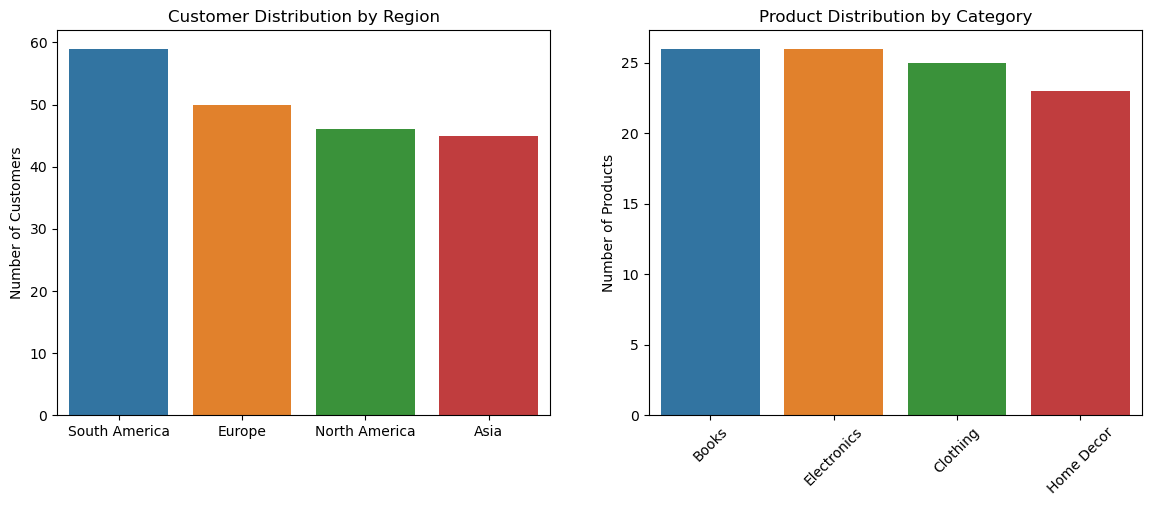

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, ax=axes[0])
axes[0].set_title("Customer Distribution by Region")
axes[0].set_ylabel("Number of Customers")

sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[1])
axes[1].set_title("Product Distribution by Category")
axes[1].set_ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

In [22]:
customers_summary, products_summary, transactions_summary

(       CustomerID      CustomerName         Region           SignupDate
 count         200               200            200                  200
 unique        200               200              4                  NaN
 top         C0001  Lawrence Carroll  South America                  NaN
 freq            1                 1             59                  NaN
 mean          NaN               NaN            NaN  2023-07-19 08:31:12
 min           NaN               NaN            NaN  2022-01-22 00:00:00
 25%           NaN               NaN            NaN  2022-09-26 12:00:00
 50%           NaN               NaN            NaN  2023-08-31 12:00:00
 75%           NaN               NaN            NaN  2024-04-12 12:00:00
 max           NaN               NaN            NaN  2024-12-28 00:00:00,
        ProductID            ProductName Category       Price
 count        100                    100      100  100.000000
 unique       100                     66        4         NaN
 top      

In [23]:
signup_trends = customers_df["SignupDate"].dt.year.value_counts().sort_index()

In [24]:
transactions_trends = transactions_df["TransactionDate"].dt.to_period("M").value_counts().sort_index()

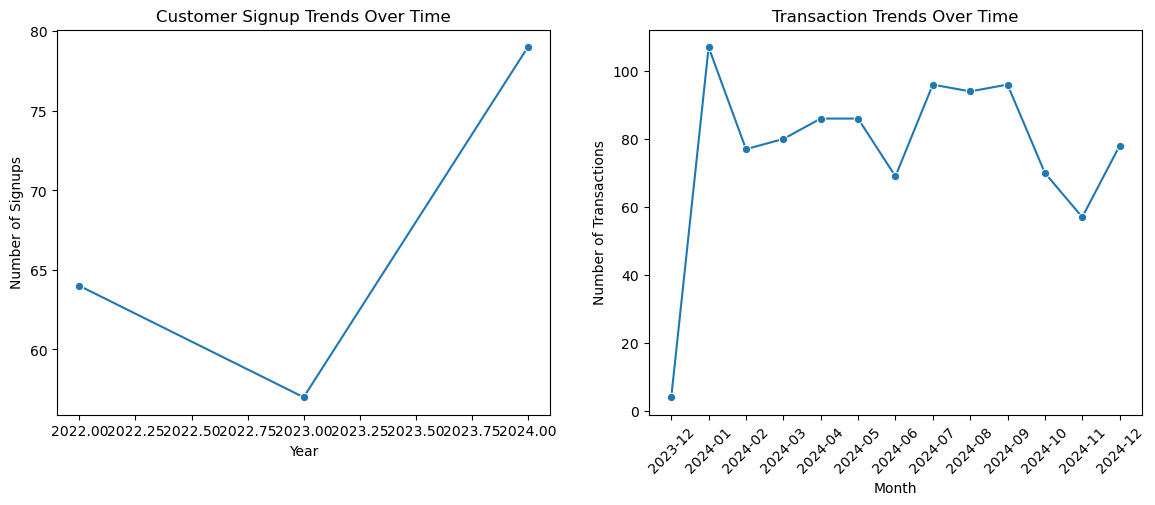

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker="o", ax=axes[0])
axes[0].set_title("Customer Signup Trends Over Time")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Signups")

transactions_trends.index = transactions_trends.index.astype(str)  # Convert Period to string for plotting
sns.lineplot(x=transactions_trends.index, y=transactions_trends.values, marker="o", ax=axes[1])
axes[1].set_title("Transaction Trends Over Time")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Transactions")
plt.xticks(rotation=45)

plt.show()

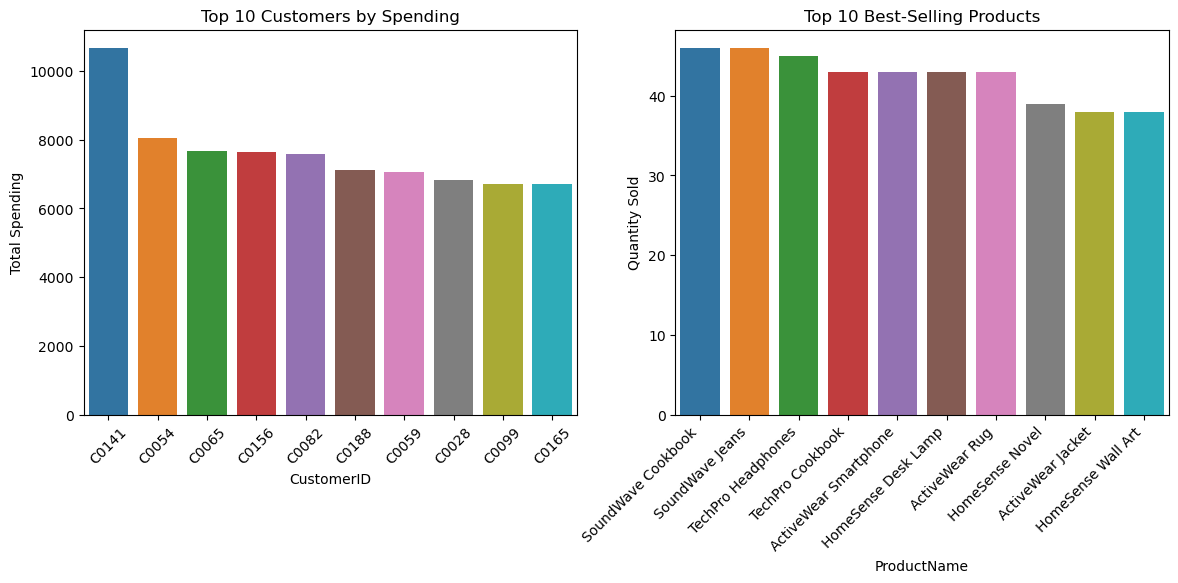

In [31]:
top_customers = transactions_df.groupby("CustomerID")["TotalValue"].sum().nlargest(10)
top_products = transactions_df.groupby("ProductID")["Quantity"].sum().nlargest(10)
top_products = top_products.reset_index().merge(products_df, on="ProductID", how="left")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.barplot(x=top_customers.index, y=top_customers.values, ax=axes[0])
axes[0].set_title("Top 10 Customers by Spending")
axes[0].set_ylabel("Total Spending")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


sns.barplot(x=top_products["ProductName"], y=top_products["Quantity"], ax=axes[1])
axes[1].set_title("Top 10 Best-Selling Products")
axes[1].set_ylabel("Quantity Sold")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.show()

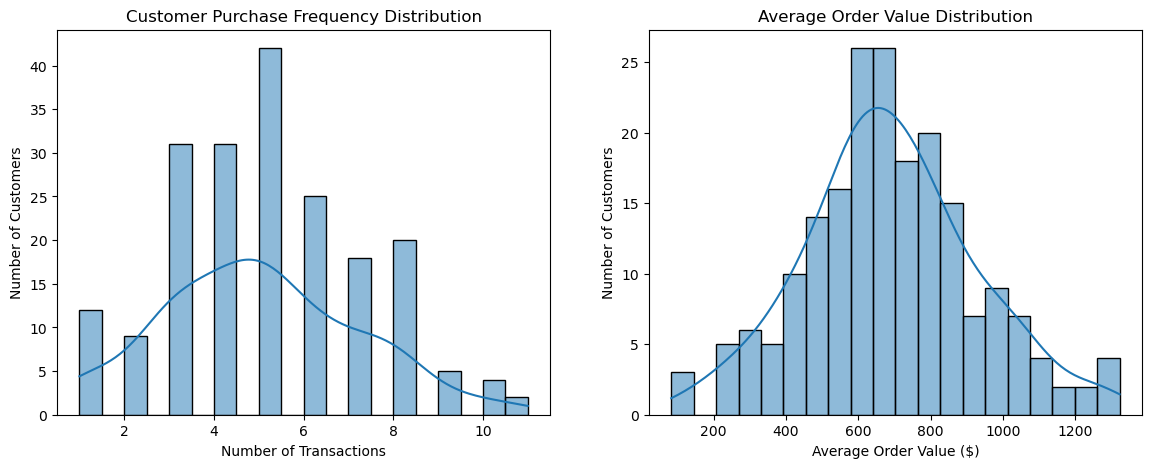

In [32]:
purchase_frequency = transactions_df["CustomerID"].value_counts()
average_order_value = transactions_df.groupby("CustomerID")["TotalValue"].mean()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(purchase_frequency, bins=20, kde=True, ax=axes[0])
axes[0].set_title("Customer Purchase Frequency Distribution")
axes[0].set_xlabel("Number of Transactions")
axes[0].set_ylabel("Number of Customers")

sns.histplot(average_order_value, bins=20, kde=True, ax=axes[1])
axes[1].set_title("Average Order Value Distribution")
axes[1].set_xlabel("Average Order Value ($)")
axes[1].set_ylabel("Number of Customers")

plt.show()